In [ ]:
# 📌 Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # 📂 Step 2: Extract Zip Dataset (adjust path if needed)
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive.zip'  # Update with your zip file path
extract_path = '/content/fruits_data'  # Temporary extract location

# Remove previous extraction if exists
!rm -rf /content/fruits_data

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 🔍 Step 3: Check extracted folder structure
for root, dirs, files in os.walk(extract_path):
    print("🔍 Root:", root)
    for name in dirs:
        print("📁", name)
    for name in files:
        print("📄", name)
    break  # remove this to go deeper if needed

🔍 Root: /content/fruits_data
📁 Dataset


In [ ]:
# ✅ Step 4: Set dataset directories
# Adjust based on folder structure inside zip
train_dir = os.path.join(extract_path, '/content/fruits_data/Dataset/Visual_Dataset/Train')  # change if needed
val_dir = os.path.join(extract_path, '/content/fruits_data/Dataset/Visual_Dataset/Test')     # change if needed

In [ ]:
# 📦 Step 5: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# ⚙ Step 5.1: Data Preprocessing
img_size = 224
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               horizontal_flip=True)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(img_size, img_size),
                                           batch_size=batch_size,
                                           class_mode='categorical')
val_data = val_gen.flow_from_directory(val_dir,
                                       target_size=(img_size, img_size),
                                       batch_size=batch_size,
                                       class_mode='categorical')

Found 8372 images belonging to 10 classes.
Found 2385 images belonging to 10 classes.


In [ ]:

# 🧠 Step 6: Load MobileNetV2 + Build Model
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# 🚀 Step 7: Train the Model
history = model.fit(train_data, epochs=5, validation_data=val_data)


Epoch 1/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 565s 2s/step - accuracy: 0.6652 - loss: 0.9810 - val_accuracy: 0.9094 - val_loss: 0.2669
Epoch 2/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.9107 - loss: 0.2752 - val_accuracy: 0.8759 - val_loss: 0.3165
Epoch 3/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - accuracy: 0.9440 - loss: 0.1805 - val_accuracy: 0.9187 - val_loss: 0.2282
Epoch 4/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.9557 - loss: 0.1356 - val_accuracy: 0.8864 - val_loss: 0.2997
Epoch 5/5
262/262 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.9607 - loss: 0.1191 - val_accuracy: 0.9149 - val_loss: 0.2581


In [16]:
# 💾 Step 8: Save the Model
model_path = '/content/drive/MyDrive/smart_sorting_model.h5'
model.save(model_path)
print(f"✅ Model saved at: {model_path}")


✅ Model saved at: /content/drive/MyDrive/smart_sorting_model.h5


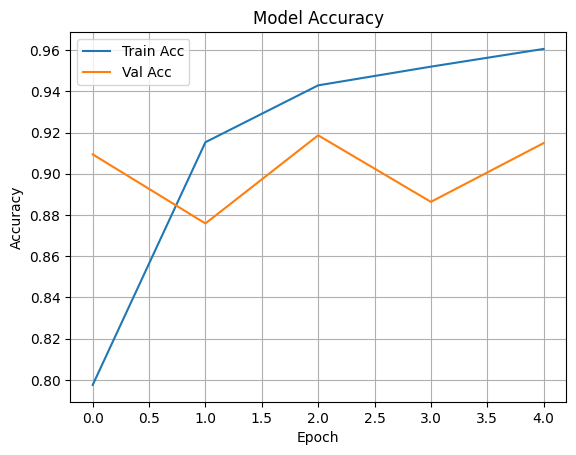

In [17]:
# 📊 Step 9: Plot Training History
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Saving pic.jpg to pic (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

🧠 Predicted: FreshApple


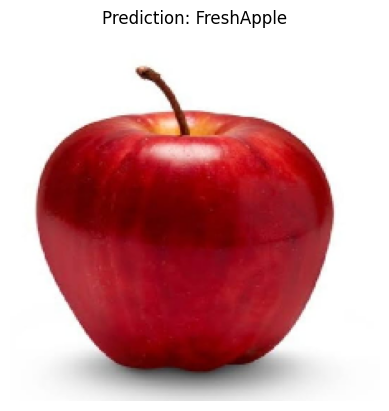

In [18]:
# 🔍 Step 10: Upload & Predict a Single Image
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = list(class_indices.keys())[np.argmax(prediction)]
    print(f"\n🧠 Predicted: {predicted_class}")

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

predict_image(img_path, model, train_data.class_indices)
